In [2]:
import pandas as pd

df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

In [25]:
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])

In [4]:
num = df.select_dtypes("int64")
cat = df.select_dtypes("object")

## Linear Regression
## 1. X-y split (y is the target variable, in this case, "total claim amount")
## 2. Train-test split.
## 3. Standardize the data (after the data split!).
## 4. Apply linear regression.
## 5. Model Interpretation.

### Using the original numerical dataframe (num) before scaling.
### Defining our independent variables and the dependent variable.

In [5]:
import numpy as np

In [6]:
num_1 = num.drop(columns="total_claim_amount")

In [7]:
X = np.array(num_1)

In [8]:
X

array([[ 4809, 48029,    61, ...,    52,     0,     9],
       [ 2228, 92260,    64, ...,    26,     0,     1],
       [14947, 22139,   100, ...,    31,     0,     2],
       ...,
       [23893, 39837,   201, ...,    63,     0,     2],
       [11971, 64195,   158, ...,    27,     4,     6],
       [ 6857, 68942,   101, ...,     1,     0,     3]], dtype=int64)

In [9]:
y = np.array(num["total_claim_amount"]).reshape(-1,1)

### Splitting the data

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 100)

## Scaling the Data
### I will transfrom the indepedent variables and dependent variable since they are not all normally distributed.

In [12]:
from sklearn.preprocessing import PowerTransformer

In [13]:
pt = PowerTransformer(method='yeo-johnson')
pt.fit(X_train)
X_train_transformed = pt.transform(X_train)
X_test_transformed = pt.transform(X_test)

In [14]:
pt.fit(y_train)
y_train_transformed = pt.transform(y_train)
y_test_transformed = pt.transform(y_test)

## Performing Linear Regression

In [15]:
lm = LinearRegression()
model = lm.fit(X_train_transformed,y_train_transformed)

In [16]:
print("Slope =", model.coef_)
print("Intercept =", model.intercept_)

Slope = [[-2.08480481e-02 -1.43758190e-01  4.96258343e-01 -9.76148844e-05
  -5.65452562e-03 -2.11877522e-02  1.97560397e-02]]
Intercept = [5.84527671e-12]


## Comparing

In [17]:
y_pred = model.predict(X_test_transformed)

In [18]:
compare = pd.DataFrame({'y_test':list(y_test_transformed) ,'y_pred': list(y_pred)})

In [19]:
compare

,y_test,y_pred
0,[-0.24396624958434066],[-0.5329755038427559]
1,[0.26434240768752915],[0.43784774727757964]
2,[-2.217679240628924],[0.40376159507645215]
3,[-1.3251063471108266],[0.01458986126476162]
4,[1.7008351797377181],[0.9718752095469467]
...,...,...
3202,[0.22065479805990468],[-0.9183327212290082]
3203,[0.2409017326320982],[0.6686653167342379]
3204,[2.2392343647745285],[1.1509166638082813]
3205,[-1.5646410368808357],[-0.8757387844982379]


### Model Evaluation

In [20]:
import matplotlib.pyplot as plt

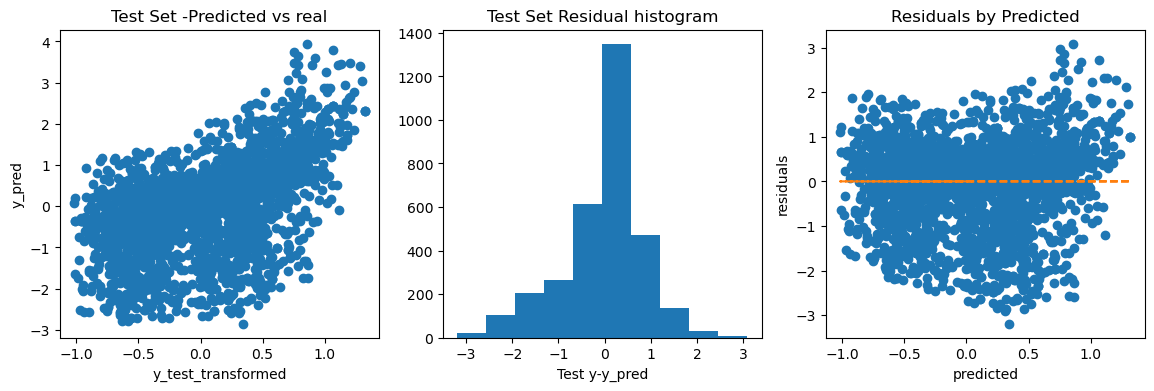

In [21]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test_transformed, 'o')
ax[0].set_xlabel("y_test_transformed")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscedasticity
# Does it resemble a normal distribution?
ax[1].hist(y_test_transformed - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test_transformed - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

## Model Validation

In [43]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2
mse = mse(y_test_transformed,y_pred)
print("MSE =",mse)

MSE = 0.7637981044286775


In [44]:
mae = mae(y_test_transformed,y_pred)
print("MAE =",mae)

MAE = 0.6295226660494436


In [45]:
import math

In [46]:
RMSE = math.sqrt(mse)
print("RMSE =",RMSE)

RMSE = 0.8739554361800591


In [47]:
r2 = r2(y_test_transformed,y_pred)
print("R2 =",r2)

R2 = 0.2630439296055753
